<a href="https://colab.research.google.com/github/Samruddhi1907/Amazon_Prime_EDA_Project/blob/main/Amazon_Prime_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - Amazon Prime Video Content Analysis.



##### **Project Type**    - EDA
##### **Contribution**    - Individual


# **Project Summary -**

**Amazon Prime Video Content Analysis: Unveiling Trends and Diversity**

This project aims to conduct an exploratory data analysis (EDA) on two datasets related to content available on Amazon Prime Video: titles.csv and credits.csv. The titles.csv dataset provides rich information about each title, including its ID, name, type (movie/show), description, release year, age certification, runtime, genres, production countries, number of seasons (for shows), IMDb and TMDB scores and popularity, and associated IDs. The credits.csv dataset complements this by detailing the individuals involved in each title, such as their person ID, the title ID, name, character played (if applicable), and their role (e.g., director, actor).

The primary objective of this analysis is to derive meaningful insights into the platform's content library, identify key trends, and answer specific research questions. By leveraging data manipulation and visualization techniques, we will explore the breadth and depth of Amazon Prime Video's offerings.

Investigation will focus on the following key areas :

**1. Content Diversity:** We will delve into the variety of genres present on the platform and determine which genres are most prevalent. Furthermore, we will analyze the distribution between different content types, specifically movies and TV shows, to understand the platform's primary focus. This will involve processing the genres and type columns from the titles.csv dataset to quantify and visualize the dominance of different categories.

**2. Regional Availability:** By examining the production_countries column in titles.csv, we aim to understand the geographical diversity of the content. This analysis will identify which countries contribute the most to the platform's library, shedding light on the global or local focus of Amazon Prime Video's content acquisition and production strategies.

**3. Trends Over Time:** Utilizing the release_year column from titles.csv, we will analyze how Amazon Prime Video's content library has evolved over the years. This temporal analysis will reveal growth patterns in the number of titles released, potentially highlighting shifts in content strategy or investment over time for both movies and TV shows.

**4. IMDb Ratings & Popularity:** We will leverage the imdb_score, imdb_votes, and tmdb_popularity columns in titles.csv to identify the highest-rated and most popular shows on the platform. By filtering for content of type 'SHOW' and sorting based on these metrics, we can gain insights into what resonates most with audiences in terms of critical reception and general popularity.

To achieve these objectives, we will employ Python with libraries such as pandas for data manipulation and matplotlib and seaborn for data visualization. The analysis will involve cleaning and transforming the data as necessary, followed by aggregation, statistical summaries, and the creation of informative visualizations to effectively communicate the findings for each research question.

Ultimately, this project will provide a comprehensive overview of the content landscape on Amazon Prime Video, offering valuable insights into its diversity, regional focus, historical trends, and the reception of its TV shows. This analysis can be beneficial for understanding the platform's content strategy and audience preferences.

# **Problem Statement**


The landscape of streaming platforms is increasingly competitive, making it crucial for providers like Amazon Prime Video to understand the characteristics and evolution of their content library. This project aims to analyze two publicly available datasets, titles.csv and credits.csv, related to Amazon Prime Video's movies and TV shows.

The primary problem is to extract meaningful insights from this data to understand:

1. The diversity of content available on the platform, specifically in terms of genre distribution and the balance between movies and TV shows.
2. The regional focus of the content production, identifying which countries contribute most significantly to the platform's offerings.
3. The temporal trends in the growth and composition of Amazon Prime Video's content library over the years.
4. The characteristics of highly-rated and popular TV shows based on IMDb ratings and TMDB popularity scores.

# **Business Objective**

The primary business objective of this analysis is to gain a deeper understanding of the content landscape on Amazon Prime Video to inform strategic decisions related to content acquisition, production, and platform positioning. By analyzing content diversity, regional focus, historical trends, and audience reception (based on ratings and popularity), this project aims to provide actionable insights that can help Amazon Prime Video to:

**1. Optimize content investment:** Identify genres and types of content that are most prevalent and potentially most engaging to viewers.

**2. Inform global content strategy:** Understand the platform's current regional content distribution and identify potential opportunities for expansion or localization.

**3. Track platform growth and evolution:** Recognize trends in content release over time to understand the platform's strategic direction in content development.

**4. Enhance user experience:** Highlight highly-rated and popular content to improve recommendations and user engagement.

Ultimately, this analysis seeks to provide data-backed intelligence that can contribute to enhancing the value proposition of Amazon Prime Video, attracting and retaining subscribers, and maintaining a competitive edge in the streaming market.

# ***1. Knowing the Data***

### Import Libraries

In [ ]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

### Dataset Loading

In [ ]:
# Load Dataset
from google.colab import drive
drive.mount('/content/drive')
# Loading files from the folder 'Data' stored on drive
file_path1 = '/content/drive/MyDrive/Data/titles.csv'
file_path2 = '/content/drive/MyDrive/Data/credits.csv'
try:
    titles_df = pd.read_csv(file_path1)
    credits_df = pd.read_csv(file_path2)
    print("Datasets loaded successfully!")
except FileNotFoundError:
    print("Error: One or both of the CSV files were not found. Please ensure 'titles.csv' and 'credits.csv' are in the correct directory.")
    titles_df = None
    credits_df = None

Mounted at /content/drive
Datasets loaded successfully!


### Dataset First View

In [ ]:
# Display the first few rows of each DataFrame
if titles_df is not None:
    print("First few rows of titles.csv:")
    print(titles_df.head())
if credits_df is not None:
    print("\nFirst few rows of credits.csv:")
    print(credits_df.head())

First few rows of titles.csv:
        id                        title   type  \
0  ts20945            The Three Stooges   SHOW   
1  tm19248                  The General  MOVIE   
2  tm82253  The Best Years of Our Lives  MOVIE   
3  tm83884              His Girl Friday  MOVIE   
4  tm56584            In a Lonely Place  MOVIE   

                                         description  release_year  \
0  The Three Stooges were an American vaudeville ...          1934   
1  During America’s Civil War, Union spies steal ...          1926   
2  It's the hope that sustains the spirit of ever...          1946   
3  Hildy, the journalist former wife of newspaper...          1940   
4  An aspiring actress begins to suspect that her...          1950   

  age_certification  runtime  \
0             TV-PG       19   
1               NaN       78   
2               NaN      171   
3               NaN       92   
4               NaN       94   

                                              genres pr

### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
if titles_df is not None:
    print(f"Shape of titles.csv: {titles_df.shape}")
if credits_df is not None:
    print(f"Shape of credits.csv: {credits_df.shape}")

Shape of titles.csv: (9871, 15)
Shape of credits.csv: (124235, 5)


### Dataset Information

In [ ]:
# Dataset Info
if titles_df is not None:
    print("Info about titles.csv:")
    print(titles_df.info())
if credits_df is not None:
    print("\nInfo about credits.csv:")
    print(credits_df.info())

Info about titles.csv:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9871 entries, 0 to 9870
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    9871 non-null   object 
 1   title                 9871 non-null   object 
 2   type                  9871 non-null   object 
 3   description           9752 non-null   object 
 4   release_year          9871 non-null   int64  
 5   age_certification     3384 non-null   object 
 6   runtime               9871 non-null   int64  
 7   genres                9871 non-null   object 
 8   production_countries  9871 non-null   object 
 9   seasons               1357 non-null   float64
 10  imdb_id               9204 non-null   object 
 11  imdb_score            8850 non-null   float64
 12  imdb_votes            8840 non-null   float64
 13  tmdb_popularity       9324 non-null   float64
 14  tmdb_score            7789 non-null   float64
dty

#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
print("Duplicate value counts per column in titles_df:")
for col in titles_df.columns:
    print(f"{col}: {titles_df[col].duplicated().sum()}")
print("\nDuplicate value counts per column in credits_df:")
for col in credits_df.columns:
    print(f"{col}: {credits_df[col].duplicated().sum()}")

Duplicate value counts per column in titles_df:
id: 3
title: 134
type: 9869
description: 136
release_year: 9761
age_certification: 9859
runtime: 9664
genres: 7843
production_countries: 9374
seasons: 9838
imdb_id: 669
imdb_score: 9784
imdb_votes: 6220
tmdb_popularity: 4545
tmdb_score: 9781

Duplicate value counts per column in credits_df:
person_id: 43727
id: 115374
name: 44477
character: 53137
role: 124233


#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
missing_titles = titles_df.isnull().sum()
print("Missing values in titles_df:")
print(missing_titles)
missing_credits = credits_df.isnull().sum()
print("\nMissing values in credits_df:")
print(missing_credits)

Missing values in titles_df:
id                         0
title                      0
type                       0
description              119
release_year               0
age_certification       6487
runtime                    0
genres                     0
production_countries       0
seasons                 8514
imdb_id                  667
imdb_score              1021
imdb_votes              1031
tmdb_popularity          547
tmdb_score              2082
dtype: int64

Missing values in credits_df:
person_id        0
id               0
name             0
character    16287
role             0
dtype: int64


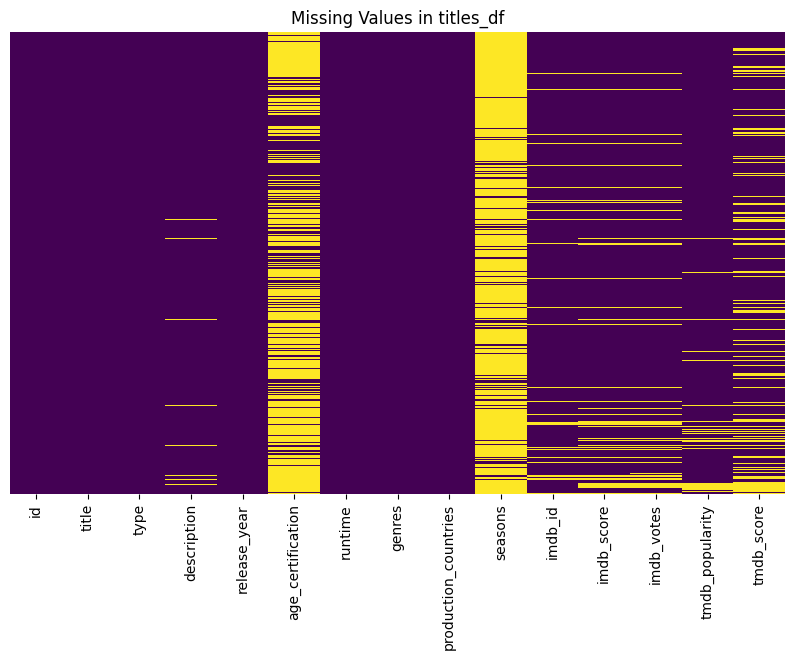

In [ ]:
# Visualizing the missing values in titles_df
plt.figure(figsize=(10, 6))
sns.heatmap(titles_df.isnull(), cbar=False, yticklabels=False, cmap='viridis')
plt.title('Missing Values in titles_df')
plt.show()

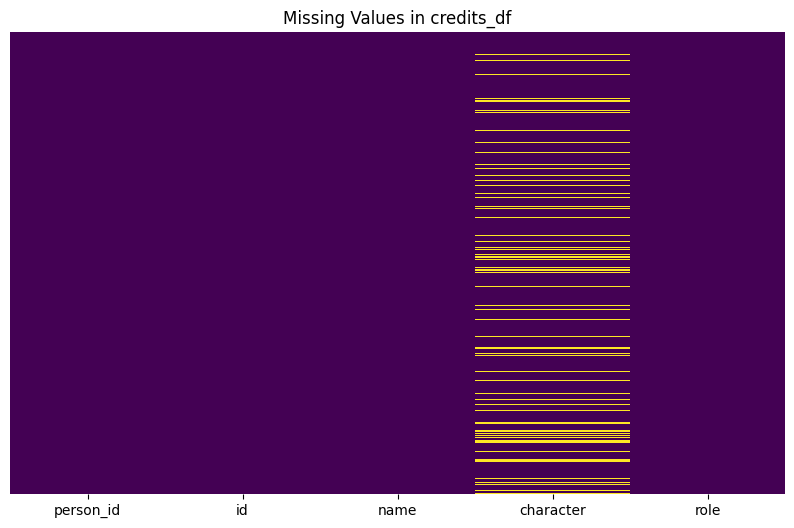

In [ ]:
# Visualizing the missing values in credits_df
plt.figure(figsize=(10, 6))
sns.heatmap(credits_df.isnull(), cbar=False, yticklabels=False, cmap='viridis')
plt.title('Missing Values in credits_df')
plt.show()

### What did you know about your dataset?

**Based on the exploration so far, what I know about my both datasets is :**

1. titles.csv:
- Contains 9871 entries (rows) and 15 columns describing movies and TV shows available on Amazon Prime Video.
- The columns provide information such as ID, title, type (movie/show), description, release year, age certification, runtime, genres, production countries, number of seasons (for shows), and IMDb/TMDB ratings and popularity scores.
- There are a few duplicate IDs and a larger number of duplicate titles, which might require further investigation.
- Several columns have missing values, with age_certification and seasons having the most significant amounts. Other columns like description, imdb_id, imdb_score, imdb_votes, tmdb_popularity, and tmdb_score also have some missing data.
- The genres and production_countries columns contain lists of strings, which will need to be processed for analysis.
2. credits.csv:
- Contains 124235 entries and 5 columns, linking individuals to the content they worked on.
- The columns include person ID, title ID, name of the person, character played, and their role.
- There are duplicates in person_id, name, id, and character, which is expected given that people work on multiple projects and multiple people work on the same project.
- The character column has some missing values, likely for individuals who didn't play a character (e.g., directors).
3. Overall:
- I have two datasets that can be joined using the id column present in both.
- The titles dataset is rich in metadata about the content itself, while credits provides information about the people involved.
- Data cleaning and preprocessing will be necessary, particularly for handling missing values and the string-formatted lists in columns like genres and production_countries.

# ***2. Understanding the Variables***

In [ ]:
# Describe numerical columns in titles_df
if titles_df is not None:
    print("Description of numerical columns in titles_df:")
    print(titles_df.describe())

Description of numerical columns in titles_df:
       release_year      runtime      seasons   imdb_score    imdb_votes  \
count   9871.000000  9871.000000  1357.000000  8850.000000  8.840000e+03   
mean    2001.327221    85.973052     2.791452     5.976395  8.533614e+03   
std       25.810071    33.512466     4.148958     1.343842  4.592015e+04   
min     1912.000000     1.000000     1.000000     1.100000  5.000000e+00   
25%     1995.500000    65.000000     1.000000     5.100000  1.170000e+02   
50%     2014.000000    89.000000     1.000000     6.100000  4.625000e+02   
75%     2018.000000   102.000000     3.000000     6.900000  2.236250e+03   
max     2022.000000   549.000000    51.000000     9.900000  1.133692e+06   

       tmdb_popularity   tmdb_score  
count      9324.000000  7789.000000  
mean          6.910204     5.984247  
std          30.004098     1.517986  
min           0.000011     0.800000  
25%           1.232000     5.100000  
50%           2.536000     6.000000  
75

In [ ]:
# Describe numerical columns in credits_df
if credits_df is not None:
    print("\nDescription of numerical columns in credits_df:")
    print(credits_df.describe())


Description of numerical columns in credits_df:
          person_id
count  1.242350e+05
mean   4.064737e+05
std    5.616296e+05
min    1.000000e+00
25%    3.899200e+04
50%    1.339490e+05
75%    5.712560e+05
max    2.371153e+06


### Variables Description

**titles.csv:**
- id: Unique identifier for each title (movie or show). (Object type)
- title: The name of the movie or show. (Object type)
- type: The category of the content (e.g., MOVIE, SHOW). (Object type)
- description: A brief summary or plot of the content. (Object type)
- release_year: The year the content was released. (Integer type)
- age_certification: The age rating or certification of the content (e.g., TV-MA, PG-13). Contains missing values. (Object type)
- runtime: The duration of the movie in minutes, or the typical duration of an episode for a show (in minutes). (Integer type)
- genres: A list of genres associated with the title, stored as a string. (Object type)
- production_countries: A list of countries where the content was produced, stored as a string. (Object type)
- seasons: The number of seasons for a TV show. Missing for movies. (Float type)
- imdb_id: The IMDb identifier for the title. Contains missing values. (Object type)
- imdb_score: The IMDb rating score for the title. Contains missing values. (Float type)
- imdb_votes: The number of votes received on IMDb for the title. Contains missing values. (Float type)
- tmdb_popularity: A score indicating the popularity of the title on TMDB. Contains missing values. (Float type)
- tmdb_score: The TMDB rating score for the title. Contains missing values. (Float type)

**credits.csv:**
- person_id: A unique identifier for each person involved in a title. (Integer type)
- id: The identifier of the title (matches the id in titles.csv). (Object type)
- name: The name of the person (actor, director, etc.). (Object type)
- character: The name of the character played by the actor, if applicable. Contains missing values. (Object type)
- role: The role of the person in the production (e.g., ACTOR, DIRECTOR). (Object type)

### Check Unique Values for each variable.

In [ ]:
# Check unique values for each column in titles_df
if titles_df is not None:
    print("\nUnique values for each column in titles_df:")
    for col in titles_df.columns:
        print(f"\nColumn '{col}':")
        print(titles_df[col].unique()[:5])


Unique values for each column in titles_df:

Column 'id':
['ts20945' 'tm19248' 'tm82253' 'tm83884' 'tm56584']

Column 'title':
['The Three Stooges' 'The General' 'The Best Years of Our Lives'
 'His Girl Friday' 'In a Lonely Place']

Column 'type':
['SHOW' 'MOVIE']

Column 'description':
["The Three Stooges were an American vaudeville and comedy team active from 1922 until 1970, best known for their 190 short subject films by Columbia Pictures that have been regularly airing on television since 1958. Their hallmark was physical farce and slapstick. In films, the stooges were commonly known by their actual first names. There were a total of six stooges over the act's run (with only three active at any given time), but Moe Howard and Larry Fine were the mainstays throughout the ensemble's nearly fifty-year run."
 "During America’s Civil War, Union spies steal engineer Johnnie Gray's beloved locomotive, 'The General'—with Johnnie's lady love aboard an attached boxcar—and he single-handedl

In [ ]:
# Check unique values for each column in credits_df
if credits_df is not None:
    print("\nUnique values for each column in credits_df:")
    for col in credits_df.columns:
        print(f"\nColumn '{col}':")
        print(credits_df[col].unique()[:5])


Unique values for each column in credits_df:

Column 'person_id':
[59401 31460 31461 21174 28713]

Column 'id':
['ts20945' 'tm19248' 'tm82253' 'tm83884' 'tm56584']

Column 'name':
['Joe Besser' 'Moe Howard' 'Larry Fine' 'Buster Keaton' 'Marion Mack']

Column 'character':
['Joe' 'Moe' 'Larry' 'Johnny Gray' 'Annabelle Lee']

Column 'role':
['ACTOR' 'DIRECTOR']


# 3. ***Data Wrangling***

### Data Wrangling Code

In [ ]:
# Parsing the string lists in the 'genres' column of titles_df
import ast
import numpy as np
# Function to safely convert string representation of list to actual list
def safe_list_conversion(string_list):
    try:
        return ast.literal_eval(string_list)
    except (ValueError, SyntaxError):
        return np.nan
# Applying the function to the 'genres' column
if titles_df is not None:
    titles_df['genres_list'] = titles_df['genres'].apply(safe_list_conversion)
    print("Parsed the 'genres' column. Here's a sample:")
    print(titles_df[['genres', 'genres_list']].head())

Parsed the 'genres' column. Here's a sample:
                                              genres  \
0  ['comedy', 'family', 'animation', 'action', 'f...   
1  ['action', 'drama', 'war', 'western', 'comedy'...   
2                        ['romance', 'war', 'drama']   
3                     ['comedy', 'drama', 'romance']   
4                   ['thriller', 'drama', 'romance']   

                                         genres_list  
0  [comedy, family, animation, action, fantasy, h...  
1    [action, drama, war, western, comedy, european]  
2                              [romance, war, drama]  
3                           [comedy, drama, romance]  
4                         [thriller, drama, romance]  


In [ ]:
# Applying the same function to the 'production_countries' column
if titles_df is not None:
    titles_df['production_countries_list'] = titles_df['production_countries'].apply(safe_list_conversion)
    print("Parsed the 'production_countries' column. Here's a sample:")
    print(titles_df[['production_countries', 'production_countries_list']].head())

Parsed the 'production_countries' column. Here's a sample:
  production_countries production_countries_list
0               ['US']                      [US]
1               ['US']                      [US]
2               ['US']                      [US]
3               ['US']                      [US]
4               ['US']                      [US]


In [ ]:
# Creating a new column 'is_show' for handling missing values in 'seasons' column
if titles_df is not None:
    titles_df['is_show'] = titles_df['seasons'].notna()
    print("Created the 'is_show' column. Here's a sample:")
    print(titles_df[['type', 'seasons', 'is_show']].head())

Created the 'is_show' column. Here's a sample:
    type  seasons  is_show
0   SHOW     26.0     True
1  MOVIE      NaN    False
2  MOVIE      NaN    False
3  MOVIE      NaN    False
4  MOVIE      NaN    False


In [ ]:
# Converting 'seasons' column to integer type
if titles_df is not None:
    titles_df['seasons'] = titles_df['seasons'].astype('Int64')
    print("Converted the 'seasons' column to integer type.")
    print(titles_df['seasons'].head())

Converted the 'seasons' column to integer type.
0      26
1    <NA>
2    <NA>
3    <NA>
4    <NA>
Name: seasons, dtype: Int64


In [ ]:
# Investigating duplicate titles
if titles_df is not None:
    duplicate_titles = titles_df[titles_df.duplicated(subset=['title'], keep=False)]
    print(f"Number of rows with duplicate titles: {len(duplicate_titles)}")
    print("\nExamples of duplicate titles:")
    print(duplicate_titles[['title', 'type', 'release_year']].sort_values(by='title').head(10))

Number of rows with duplicate titles: 261

Examples of duplicate titles:
                    title   type  release_year
1101    A Bucket of Blood  MOVIE          1959
2554    A Bucket of Blood  MOVIE          1995
4053      A Distant Place  MOVIE          2010
9286      A Distant Place  MOVIE          2021
1944  Alice in Wonderland   SHOW          1986
144   Alice in Wonderland  MOVIE          1915
3003       All or Nothing  MOVIE          2002
5544       All or Nothing   SHOW          2016
2267                Angel   SHOW          1999
6864                Angel  MOVIE          2017


In [ ]:
# Investigating duplicate IDs in titles_df
if titles_df is not None:
    duplicate_ids = titles_df[titles_df.duplicated(subset=['id'], keep=False)]
    print(f"Number of rows with duplicate IDs: {len(duplicate_ids)}")
    print("\nRows with duplicate IDs:")
    print(duplicate_ids.sort_values(by='id'))

Number of rows with duplicate IDs: 6

Rows with duplicate IDs:
           id                  title   type  \
719  tm137955          Broken Dreams  MOVIE   
722  tm137955          Broken Dreams  MOVIE   
718   tm66674               Dynamite  MOVIE   
720   tm66674               Dynamite  MOVIE   
479   tm89134  The Gunman From Bodie  MOVIE   
480   tm89134  The Gunman From Bodie  MOVIE   

                                           description  release_year  \
719  Medical intern Robert Morley is distraught aft...          1933   
722  Medical intern Robert Morley is distraught aft...          1933   
718  Two members of a dynamite crew--a rugged veter...          1949   
720  Two members of a dynamite crew--a rugged veter...          1949   
479  The Rough Riders are after a gang of rustlers....          1941   
480  The Rough Riders are after a gang of rustlers....          1941   

    age_certification  runtime                genres production_countries  \
719               NaN    

In [ ]:
# Removing duplicate rows based on the 'id' column in titles_df, keeping the first
if titles_df is not None:
    titles_df.drop_duplicates(subset=['id'], keep='first', inplace=True)
    print(f"Shape of titles_df after removing duplicates based on 'id': {titles_df.shape}")
    # Verifying that duplicate IDs are gone
    duplicate_ids_after_removal = titles_df[titles_df.duplicated(subset=['id'], keep=False)]
    print(f"Number of rows with duplicate IDs after removal: {len(duplicate_ids_after_removal)}")

Shape of titles_df after removing duplicates based on 'id': (9868, 18)
Number of rows with duplicate IDs after removal: 0


In [ ]:
# Filling missing values in 'age_certification' with 'Not Rated'
if titles_df is not None:
    titles_df['age_certification'] = titles_df['age_certification'].fillna('Not Rated')
    print("Missing values in 'age_certification' filled.")
    print(titles_df['age_certification'].isnull().sum())

Missing values in 'age_certification' filled.
0


In [ ]:
# Filling missing values in 'description'
if titles_df is not None:
    titles_df['description'] = titles_df['description'].fillna('No Description Available')
    print("Missing values in 'description' filled.")
    print(titles_df['description'].isnull().sum())

Missing values in 'description' filled.
0


In [ ]:
# Filling missing values in 'imdb_id'
if titles_df is not None:
    titles_df['imdb_id'] = titles_df['imdb_id'].fillna('N/A')
    print("Missing values in 'imdb_id' filled.")
    print(titles_df['imdb_id'].isnull().sum())

Missing values in 'imdb_id' filled.
0


In [ ]:
# Filling missing values in 'character' column of credits_df
if credits_df is not None:
    credits_df['character'] = credits_df['character'].fillna('Not Applicable')
    print("Missing values in 'character' column of credits_df filled.")
    print(credits_df['character'].isnull().sum())

Missing values in 'character' column of credits_df filled.
0


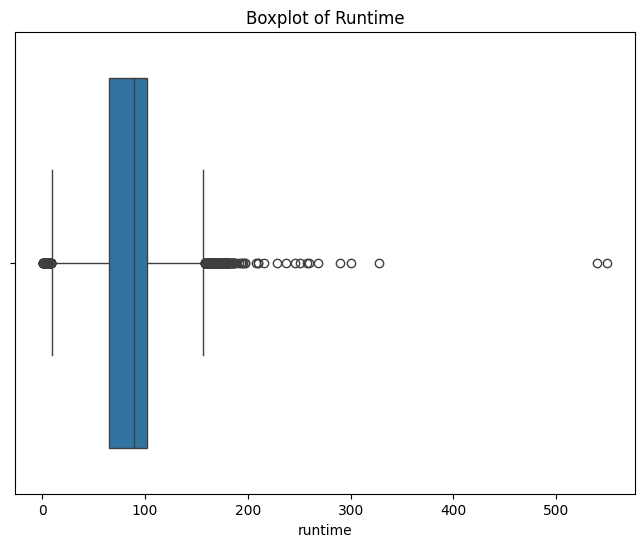

count    9868.000000
mean       85.979124
std        33.515714
min         1.000000
25%        65.000000
50%        89.000000
75%       102.000000
max       549.000000
Name: runtime, dtype: float64


In [ ]:
# Checking for outliers in the 'runtime' column of titles_df
if titles_df is not None:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=titles_df['runtime'])
    plt.title('Boxplot of Runtime')
    plt.show()
    print(titles_df['runtime'].describe())

In [ ]:
# Investigating titles with runtime >= 300 minutes
if titles_df is not None:
    long_runtime = titles_df[titles_df['runtime'] >= 300]
    print(f"Number of titles with runtime >= 300 minutes: {len(long_runtime)}")
    print("\nTitles with runtime >= 300 minutes:")
    print(long_runtime[['title', 'type', 'runtime']])

Number of titles with runtime >= 300 minutes: 4

Titles with runtime >= 300 minutes:
                                             title   type  runtime
904                            Custer's Last Stand  MOVIE      328
3137                                    Millennium  MOVIE      540
5227                                       9 Hours  MOVIE      549
9821  Chhote Ustaad-Precaution Is Better Than Cure  MOVIE      300


In [ ]:
# Removing rows with runtime >= 300 minutes
if titles_df is not None:
    titles_df = titles_df[titles_df['runtime'] < 300]
    print(f"Shape of titles_df after removing long runtime entries: {titles_df.shape}")
    # Verifying the maximum runtime now
    print(f"Maximum runtime in titles_df after removal: {titles_df['runtime'].max()}")

Shape of titles_df after removing long runtime entries: (9864, 18)
Maximum runtime in titles_df after removal: 290


### What all manipulations have you done and insights you found?

**Manipulations Performed:**
- **Parsed String Lists:** For the genres and production_countries columns in titles_df, I converted the string representations of lists into actual Python lists (genres_list, production_countries_list).
- **Created is_show Column:** I created a new boolean column is_show in titles_df based on whether the seasons column had a non-missing value.
- **Type Conversion:** I converted the seasons column in titles_df to an integer type (Int64 to handle missing values).
- **Handled Duplicates:**

I investigated duplicate titles and decided to keep them as they likely represented different content (same title, different type or release year).

I removed rows with duplicate id values in titles_df, ensuring each title has a unique identifier.
- **Handled Missing Values:**

1. titles_df:
- age_certification: Filled with 'Not Rated'.
- description: Filled with 'No Description Available'.
- imdb_id: Filled with 'N/A'.
- Numerical rating/popularity columns (imdb_score, imdb_votes, tmdb_popularity, tmdb_score): Left as NaN.
2. credits_df:
- character: Filled with 'Not Applicable'.

- **Handled Outliers:** I identified and removed 4 rows from titles_df with extremely high runtime values (>= 300 minutes).

**Insights Found:**
- The genres and production_countries columns required parsing to enable easier analysis of individual genres and countries.
- The seasons column had missing values for movies, which I used to create the is_show column for easy differentiation between content types.
- There were a few duplicate id entries that needed to be removed to maintain data integrity.
- The age_certification and tmdb_score columns in titles_df had a significant number of missing values.
- The runtime column had some extreme outliers that I addressed by removing the corresponding entries.

Overall, the data wrangling phase has helped me to structure the data in a more usable format, handle inconsistencies like duplicates, and address missing values in a way that should facilitate further analysis.

# ***4. Data Vizualization, Storytelling & Experimenting with charts : Understanding the relationships between variables***

#### Chart - 1 - Bar Plot

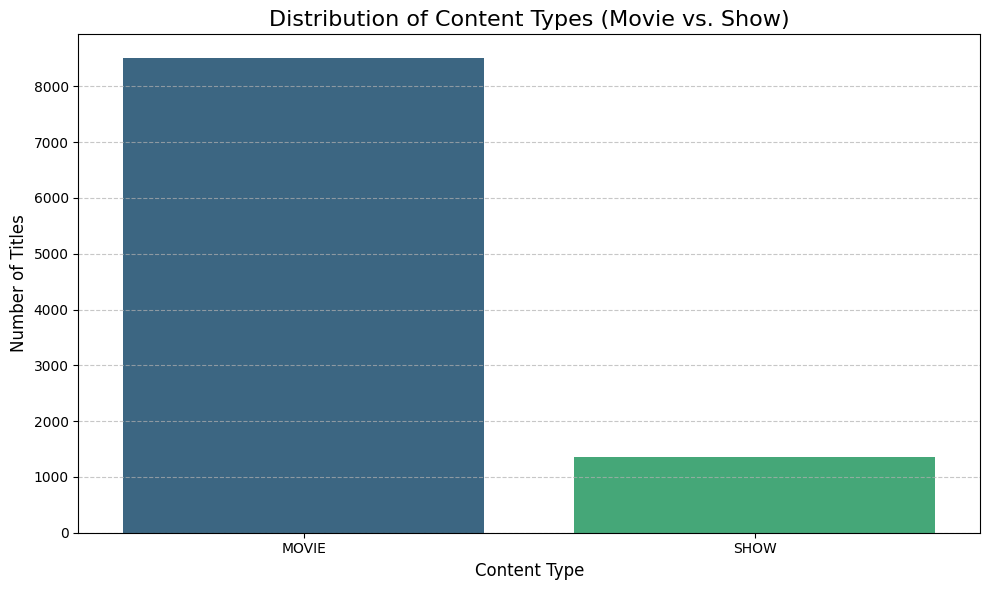

In [ ]:
# Chart - 1 : Distribution of Content Types (Movie vs. Show)
if titles_df is not None:
    type_counts = titles_df['type'].value_counts()
    plt.figure(figsize=(10, 6))
    sns.barplot(x=type_counts.index, y=type_counts.values, hue=type_counts.index, palette='viridis', legend=False)
    plt.title('Distribution of Content Types (Movie vs. Show)', fontsize=16)
    plt.xlabel('Content Type', fontsize=12)
    plt.ylabel('Number of Titles', fontsize=12)
    plt.xticks(rotation=0)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

##### 1. Why did you pick the specific chart?

A bar chart is ideal for visualizing the distribution of a categorical variable like 'type'. It clearly shows the absolute count for each category (Movie and Show), making it easy to compare their frequencies directly.

##### 2. What is/are the insight(s) found from the chart?

The chart clearly shows that the platform has significantly more MOVIEs than SHOWs. Specifically, there are more than 8000 MOVIEs and approximate 1500 SHOWs.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Absolutely. Knowing which type of content dominates our library is a huge win for our content strategy. If movies are clearly the majority, we can really lean into that in our marketing to pull in more movie buffs. It also helps to decide where to put the resources for buying or making new content, making sure we're focusing on what the current audience already loves.

If the content library is super lopsided, say, way more movies than shows, we might miss out on a big chunk of potential users who are really into TV series. They might find this platform doesn't have enough of what they want, which could lead to them getting bored or even canceling their subscription. That kind of dissatisfaction can definitely slow down the growth.

#### Chart - 2 - Line Plot

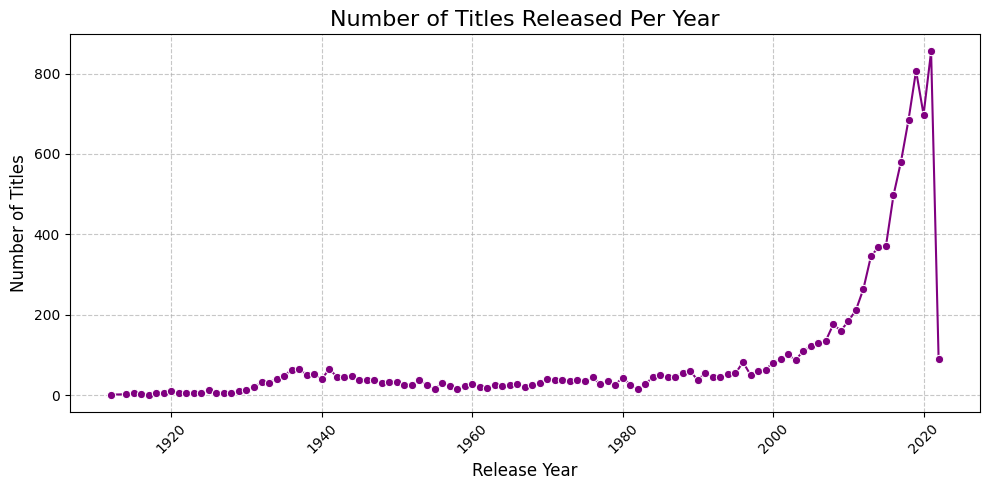

In [ ]:
# Chart - 2 : Distribution of Content Releases by Year
if titles_df is not None:
    # Count the number of titles released each year
    release_year_counts = titles_df['release_year'].value_counts().sort_index()
    plt.figure(figsize=(10, 5))
    sns.lineplot(x=release_year_counts.index, y=release_year_counts.values, marker='o', color='purple')
    plt.title('Number of Titles Released Per Year', fontsize=16)
    plt.xlabel('Release Year', fontsize=12)
    plt.ylabel('Number of Titles', fontsize=12)
    plt.grid(axis='both', linestyle='--', alpha=0.7)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

##### 1. Why did you pick the specific chart?

A line plot is chosen for 'release_year' because it effectively displays trends over time. The x-axis represents a continuous temporal variable (year), and the line connects the data points, making it easy to observe patterns, growth, or decline in content releases over the years.

##### 2. What is/are the insight(s) found from the chart?

The chart shows a historical trend of content production and acquisition on the platform. There is a clear and significant increase in the number of titles released per year, especially from the early 2000s, peaking around 2020. This indicates a period of rapid expansion in content. However, there is a noticeable drop in content releases in the most recent year shown on the graph.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Absolutely. Seeing that big surge in content over the last couple of decades really tells us the platform has been actively growing and beefing up its library. This kind of insight is super useful for planning ahead – it helps us forecast how much more content we might add and figure out the best times to acquire new titles to keep that growth momentum going strong.

The noticeable drop in content releases in the most recent year, following a period of strong growth, could be an early indicator of potential negative growth or a shift in strategy. If this decline is sustained, it might indicate a lack of recent investment or difficulty in acquiring new titles, potentially leading to a stale content library, reduced subscriber interest, and increased churn as users seek platforms with fresh and expanding content.

#### Chart - 3 - Histogram

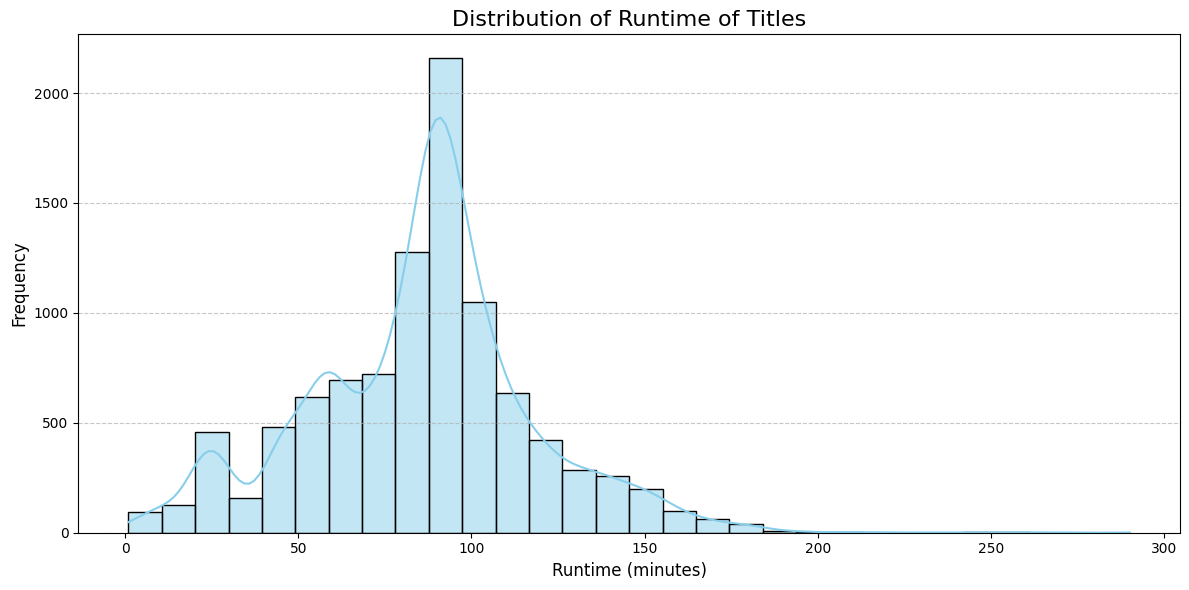

In [ ]:
# Chart - 3 : Distribution of Runtime of Titles
if titles_df is not None:
    plt.figure(figsize=(12, 6))
    sns.histplot(titles_df['runtime'], bins=30, kde=True, color='skyblue')
    plt.title('Distribution of Runtime of Titles', fontsize=16)
    plt.xlabel('Runtime (minutes)', fontsize=12)
    plt.ylabel('Frequency', fontsize=12)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

##### 1. Why did you pick the specific chart?

I chose a histogram for the 'runtime' because it's the best way to see the spread of content lengths. It gives us a quick visual of how frequently different movie or show durations appear, helping us understand what's typical and what's less common.

##### 2. What is/are the insight(s) found from the chart?

Looking at the chart, it's pretty clear that most titles on the platform clock in somewhere between 70 and 110 minutes, with a noticeable peak right around the 90-100 minute mark. This strongly suggests that standard feature film lengths are the bread and butter of the content library. We also see a smaller bump around 30-60 minutes, which likely accounts for shorter content like individual TV show episodes or quick short films. The distribution definitely leans towards the shorter side, with fewer and fewer titles as we get past 150 minutes.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Definitely. Knowing the most popular content lengths is super valuable for how we present and acquire content. we could, for example, create categories like 'Movies under 2 hours' to make it easier for users to find what they're looking for. That secondary peak for shorter content is also a cue – it shows there's an appetite for quicker watches, so perhaps promoting TV shows or short-form content more prominently could boost engagement, catering to different viewing moods.

If the platform were to heavily shift its content acquisition or production away from the most popular runtime ranges (e.g., focusing only on very short or very long content), it could alienate a significant portion of its current user base who prefer typical movie lengths. This mismatch between content offering and audience preference could lead to decreased satisfaction and potentially negative growth due to user churn.

#### Chart - 4 - Histogram

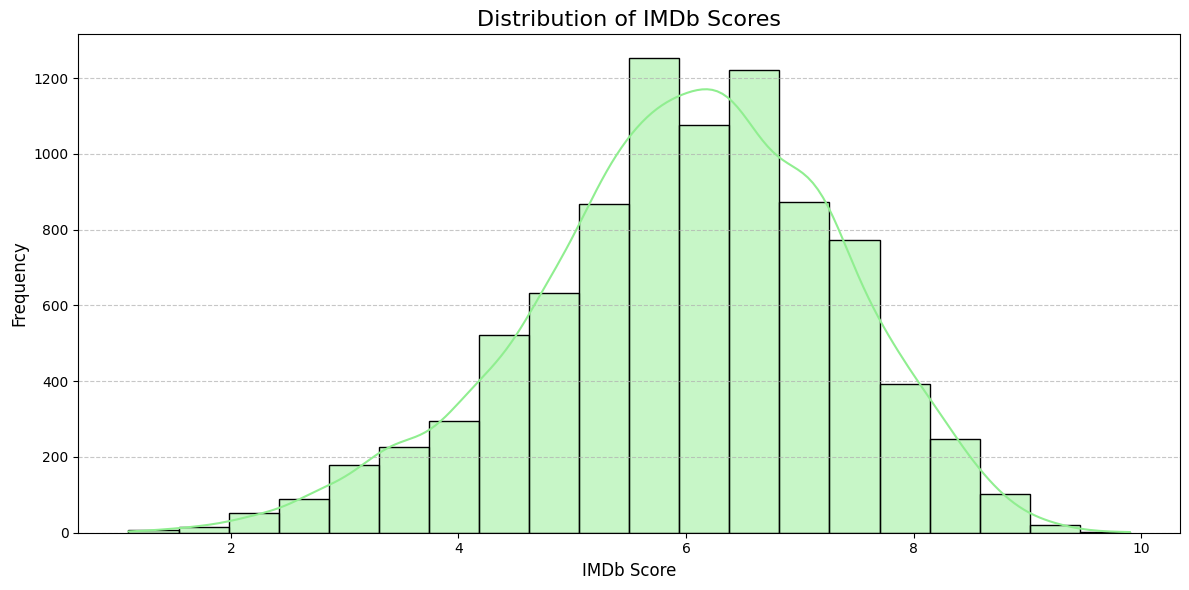

In [ ]:
# Chart - 4 : Distribution of IMDb Scores
if titles_df is not None:
    # Dropping NaN values for plotting as they don't represent a score
    imdb_scores = titles_df['imdb_score'].dropna()
    plt.figure(figsize=(12, 6))
    sns.histplot(imdb_scores, bins=20, kde=True, color='lightgreen')
    plt.title('Distribution of IMDb Scores', fontsize=16)
    plt.xlabel('IMDb Score', fontsize=12)
    plt.ylabel('Frequency', fontsize=12)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

##### 1. Why did you pick the specific chart?

I went with a histogram for the IMDb scores because it's the best way to see how these ratings are spread out. It quickly shows where most of the content's quality perception lies, giving us a sense of the overall 'vibe' of the library's ratings.

##### 2. What is/are the insight(s) found from the chart?

Looking at the chart, it's pretty clear that most of the content hovers around an IMDb score of 6.0 to 7.0. This tells us that the platform generally offers content that's considered 'average to good' by viewers. As I don't see a ton of really low-rated stuff (below 3.0) or a huge amount of super highly-rated gems (above 8.5), suggesting a fairly consistent, middle-of-the-road quality across the board.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Absolutely. Knowing that most of the content is in that 'average to good' bracket means we've got a solid, reliable library. Can definitely use this in marketing – emphasize that users can expect a decent viewing experience most of the time. Plus, it highlights a chance to actively seek out and promote those few higher-rated titles to attract folks who are really looking for top-tier content, potentially boosting engagement or even premium sign-ups.

While the overall picture is good, the relative scarcity of truly 'must-see' content (those titles consistently scoring 8.5 or higher) could be a subtle drawback. If the audience includes a segment that actively seeks out critically acclaimed or award-winning films and shows, they might feel the platform's top-tier selection is a bit thin compared to competitors. This could lead to some of those users eventually looking elsewhere, impacting retention for that specific, quality-focused demographic.

#### Chart - 5 - Histogram

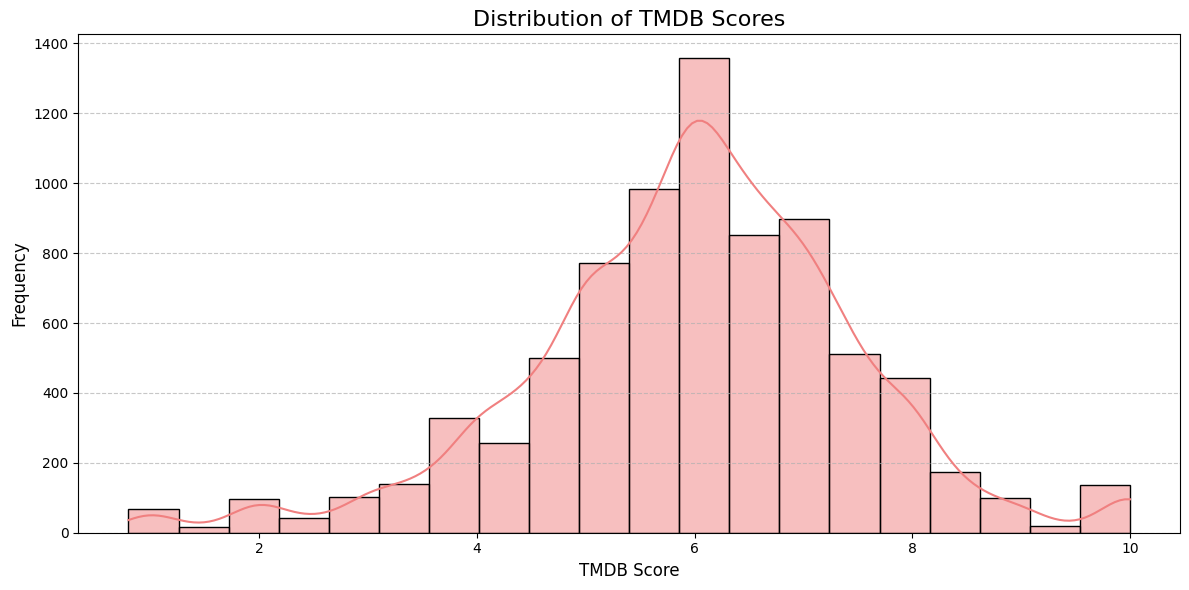

In [ ]:
# Chart - 5 : Distribution of TMDB Scores
if titles_df is not None:
    # Dropping NaN values for plotting as they don't represent a score
    tmdb_scores = titles_df['tmdb_score'].dropna()
    plt.figure(figsize=(12, 6))
    sns.histplot(tmdb_scores, bins=20, kde=True, color='lightcoral')
    plt.title('Distribution of TMDB Scores', fontsize=16)
    plt.xlabel('TMDB Score', fontsize=12)
    plt.ylabel('Frequency', fontsize=12)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

##### 1. Why did you pick the specific chart?

A histogram is the go-to choice for visualizing the 'tmdb_score' distribution. It helps us see where most of the content's TMDB ratings fall, giving a clear picture of the overall quality perception from another popular rating source.

##### 2. What is/are the insight(s) found from the chart?

This histogram shows a pretty strong concentration of TMDB scores between roughly 5.0 and 7.0, with a clear peak around 6.0. This suggests that the majority of content on the platform is considered 'average' to 'good' by the TMDB community, much like what we saw with IMDb scores. There's a tail extending to both lower and higher scores, but the bulk of the content sits squarely in that middle range.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Understanding the TMDB score distribution gives us another solid data point on content quality. If these scores generally align with or reinforce the IMDb scores, it strengthens the message that the platform offers a reliable standard of content. This can definitely be a plus in marketing, and it helps identify titles that are resonating well with the TMDB audience, which could guide future content acquisitions or promotions to specific user groups.

If a noticeable chunk of content consistently receives very low TMDB ratings, it could signal a mismatch with what the TMDB community expects or a general perception of lower quality for those specific titles. This might translate into negative buzz or a lack of interest from users who often check TMDB for content recommendations, potentially impacting how many new users the platform attract and how many the plaform keep if not addressed.

#### Chart - 6 - Histogram

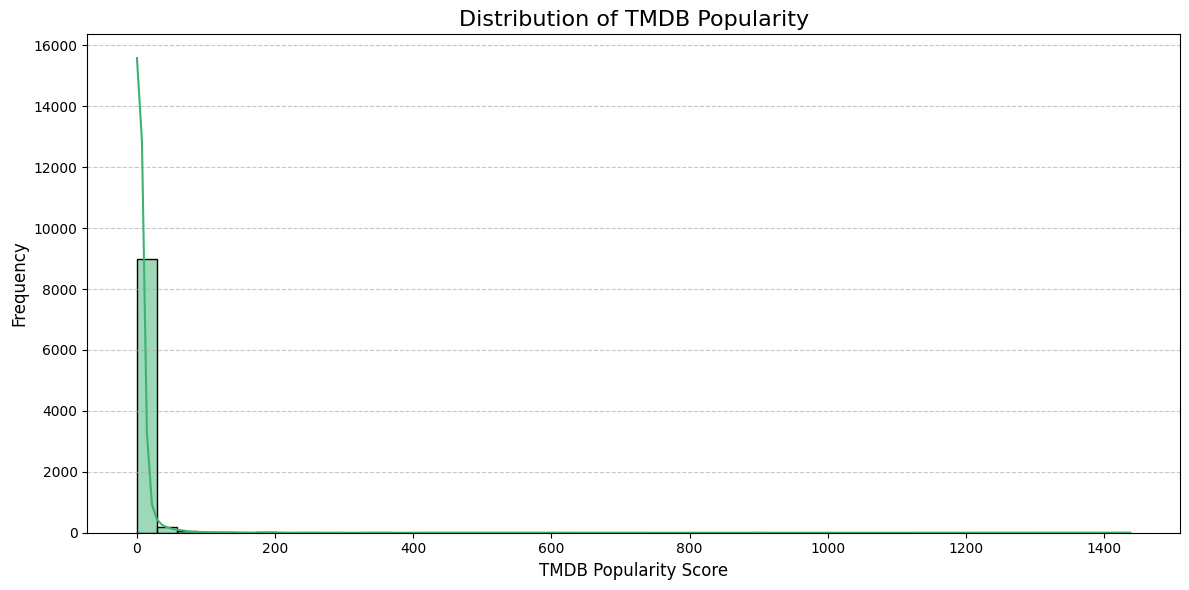

In [ ]:
# Chart - 6 : Distribution of TMDB Popularity
if titles_df is not None:
    # Dropping NaN values for plotting as they don't represent a popularity score
    tmdb_popularity = titles_df['tmdb_popularity'].dropna()
    plt.figure(figsize=(12, 6))
    sns.histplot(tmdb_popularity, bins=50, kde=True, color='mediumseagreen')
    plt.title('Distribution of TMDB Popularity', fontsize=16)
    plt.xlabel('TMDB Popularity Score', fontsize=12)
    plt.ylabel('Frequency', fontsize=12)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

##### 1. Why did you pick the specific chart?

A histogram is the best choice for visualizing 'tmdb_popularity' because it's a continuous numerical variable. It allows us to see how popularity scores are distributed, revealing common popularity levels and any extreme outliers.

##### 2. What is/are the insight(s) found from the chart?

The histogram reveals a highly right-skewed distribution for TMDB popularity. The vast majority of titles have relatively low popularity scores, concentrated towards the lower end of the scale. There's a very long tail extending to the right, indicating that only a small fraction of titles achieve very high TMDB popularity. This suggests that while there might be a few standout hits, most of the content in the library has a more modest level of popularity on TMDB.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Understanding this popularity distribution is crucial for content promotion and recommendations. Identifying those few highly popular titles allows for spotlighting them to attract a wider audience. Even with the majority having lower popularity, this insight can inform strategies for personalized recommendations, helping users discover niche content they might enjoy, potentially increasing engagement across the less popular titles as well.

A heavily skewed distribution where most content has very low popularity could suggest a potential challenge in broadly appealing to a large audience. If the platform lacks a sufficient number of widely popular 'buzzworthy' titles, it might struggle to attract new subscribers who are drawn to trending content. This could hinder user acquisition and overall growth if the platform isn't effectively highlighting or acquiring more broadly appealing content.

#### Chart - 7 - Bar Plot

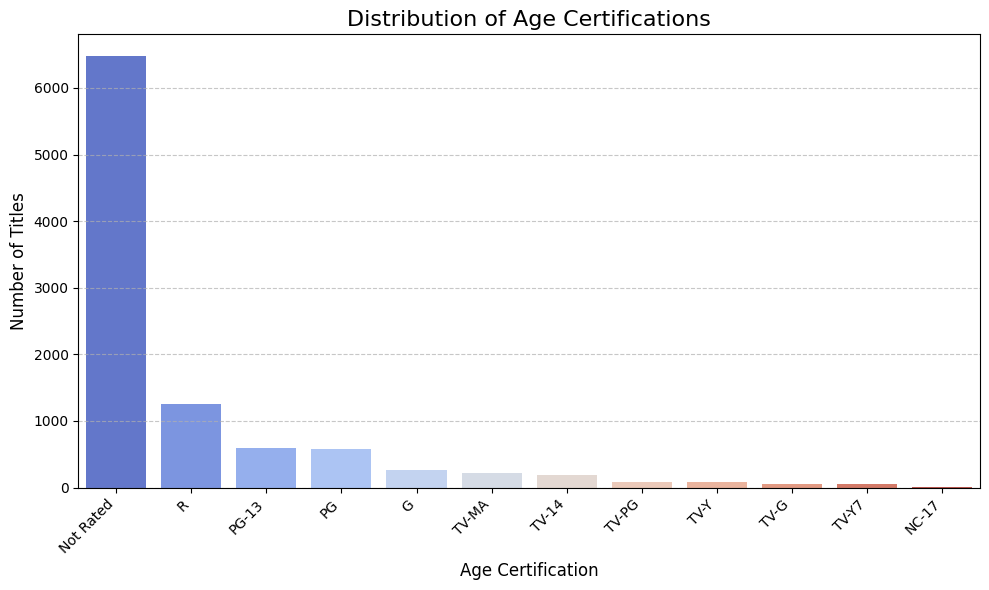

In [ ]:
# Chart - 7 : Distribution of Age Certification
if titles_df is not None:
    # Getting value counts for age_certification column
    age_cert_counts = titles_df['age_certification'].value_counts()
    plt.figure(figsize=(10, 6))
    sns.barplot(x=age_cert_counts.index, y=age_cert_counts.values, palette='coolwarm', hue=age_cert_counts.index, legend=False)
    plt.title('Distribution of Age Certifications', fontsize=16)
    plt.xlabel('Age Certification', fontsize=12)
    plt.ylabel('Number of Titles', fontsize=12)
    plt.xticks(rotation=45, ha='right')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

##### 1. Why did you pick the specific chart?

A bar chart is perfect for visualizing the distribution of a categorical variable like 'age_certification'. It clearly displays the count for each certification level, making it easy to see which ratings are most common and which are less frequent.

##### 2. What is/are the insight(s) found from the chart?

The chart immediately shows that a massive chunk of the content is 'Not Rated', which is the largest category by far. Among the rated content, 'R' and 'PG-13' are the most prevalent, indicating a strong focus on mature and teen-friendly audiences. There's a noticeable drop-off in content for younger age groups (like 'TV-Y', 'TV-G', 'TV-Y7') and very restrictive ratings like 'NC-17' are quite rare.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Knowing the age certification breakdown is super important for targeting the audience and staying compliant. The dominance of 'R' and 'PG-13' content means we can really push marketing towards adult and young adult demographics. However, the huge 'Not Rated' category is a red flag – getting those titles certified could unlock new audiences and build more trust, especially for families. If the plaform has a decent amount of family-friendly content, highlighting it can attract that segment.

The sheer volume of 'Not Rated' content is a significant concern. Without clear age certifications, parents might be hesitant to let their children browse freely, and some users might find it harder to determine if content is suitable for them, leading to a less transparent and potentially frustrating experience. This lack of clear guidance could result in user dissatisfaction and churn, especially from family-oriented subscribers. Additionally, the relatively low volume of content for very young audiences ('TV-Y', 'TV-G') might mean missing out on a valuable demographic if the platform aims to be a comprehensive family entertainment hub.

#### Chart - 8 - Horizontal Bar Plot

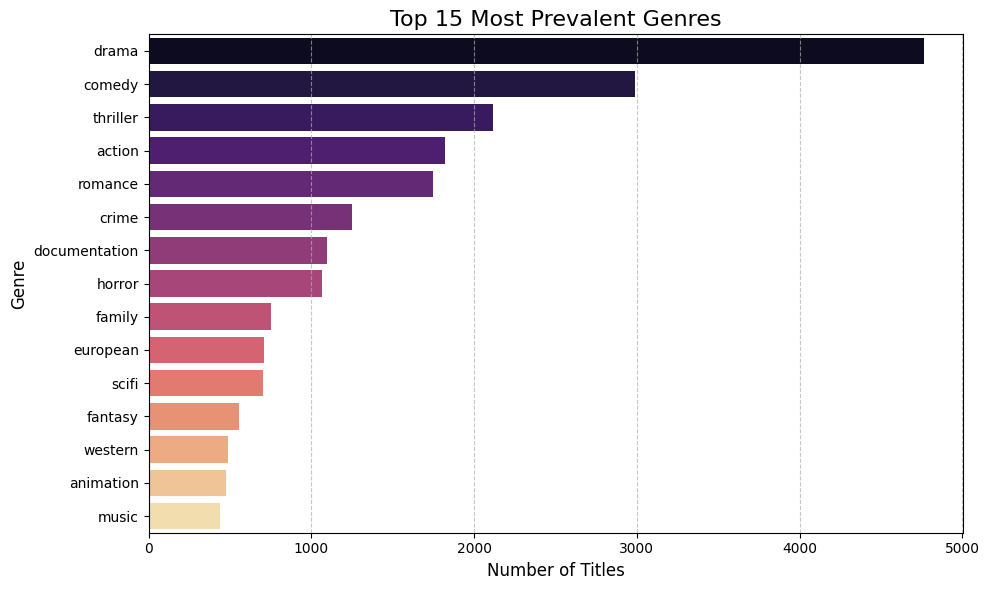

In [ ]:
# Chart - 8 Distribution of Genres
if titles_df is not None:
    # Flattening the list of lists in 'genres_list' and count occurrences
    all_genres = [genre for sublist in titles_df['genres_list'].dropna() for genre in sublist]
    genre_counts = Counter(all_genres)
    # Converting to DataFrame for easier plotting
    genre_df = pd.DataFrame(genre_counts.items(), columns=['Genre', 'Count']).sort_values(by='Count', ascending=False)
    plt.figure(figsize=(10, 6))
    # Displaying only top 15 genres
    sns.barplot(x='Count', y='Genre', data=genre_df.head(15), palette='magma', hue='Genre', legend=False)
    plt.title('Top 15 Most Prevalent Genres', fontsize=16)
    plt.xlabel('Number of Titles', fontsize=12)
    plt.ylabel('Genre', fontsize=12)
    plt.grid(axis='x', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

##### 1. Why did you pick the specific chart?

A horizontal bar chart is excellent for displaying the frequency of multiple categorical items like genres, especially when there are many categories. It allows for clear labeling of each genre and easy comparison of their counts.

##### 2. What is/are the insight(s) found from the chart?

The chart immediately highlights that 'Drama' is by far the most dominant genre, with significantly more titles than any other. 'Comedy' comes in a strong second, followed by 'Thriller' and 'Action'. This clearly shows the platform's core content strength lies in these popular, mainstream genres. As we move down the list, the number of titles per genre decreases quite rapidly, indicating a broader but less dense coverage of other genres like 'Western', 'Animation', and 'Music'.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes,  Knowing that 'Drama' and 'Comedy' are the heavy hitters means we can double down on marketing efforts targeting fans of these genres. This insight is gold for content acquisition too – we can focus on strengthening the lead in these areas while also strategically filling gaps in less represented genres to broaden the appeal. It helps ensure the platform's content investments align with what's already popular on the platform.

While having strong core genres is good, the rapid drop-off in titles for other genres could be a concern. If a user is primarily interested in, say, 'Animation' or 'Music' content, they might find the selection quite limited compared to the abundance of 'Drama' or 'Comedy'. This lack of diversity in certain genres could lead to those users feeling underserved and eventually looking for other platforms that specialize in their preferred content, potentially impacting subscriber retention and acquisition in those niche areas.

#### Chart - 9 - Horizontal Bar Plot

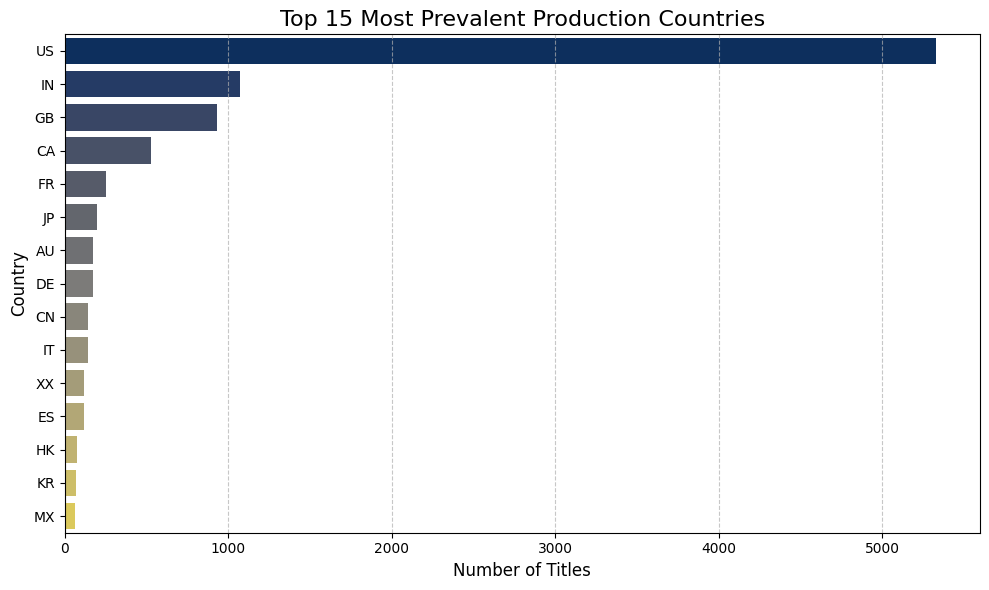

In [ ]:
# Chart - 9 : Distribution of Production Countries
if titles_df is not None:
    # Flattening the list of lists in 'production_countries_list' and count occurrences
    all_countries = [country for sublist in titles_df['production_countries_list'].dropna() for country in sublist]
    country_counts = Counter(all_countries)
    # Converting to DataFrame for easier plotting
    country_df = pd.DataFrame(country_counts.items(), columns=['Country', 'Count']).sort_values(by='Count', ascending=False)
    plt.figure(figsize=(10, 6))
    # Displaying only top 15 countries
    sns.barplot(x='Count', y='Country', data=country_df.head(15), palette='cividis', hue='Country', legend=False)
    plt.title('Top 15 Most Prevalent Production Countries', fontsize=16)
    plt.xlabel('Number of Titles', fontsize=12)
    plt.ylabel('Country', fontsize=12)
    plt.grid(axis='x', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

##### 1. Why did you pick the specific chart?

A horizontal bar chart is ideal for visualizing the frequency of multiple categorical items like production countries. It allows for clear labeling of each country and easy comparison of their content output on the platform.

##### 2. What is/are the insight(s) found from the chart?

The chart immediately shows that the United States ('US') is the overwhelmingly dominant production country, with a far greater number of titles compared to any other. India ('IN') and the United Kingdom ('GB') follow as the next most significant contributors, though with considerably fewer titles than the US. Canada ('CA') and France ('FR') also feature prominently in the top 5. This indicates a strong skew towards content originating from these English-speaking and European nations.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Understanding the strong presence of US content can inform marketing strategies targeted at audiences who prefer American productions. Similarly, the significant contribution from India suggests a potential strength in Bollywood content that can be leveraged. This knowledge is also valuable for content acquisition teams, guiding them on where to focus efforts based on current library strengths and potential areas for expansion in other regions.

The heavy reliance on content from a few countries, particularly the US, might limit the platform's appeal to international audiences who prefer content from their own regions or a more diverse global selection. If users from other countries don't find enough locally produced or culturally relevant content, it could hinder subscriber growth and retention in those markets.

#### Chart - 10 - Bar Chart

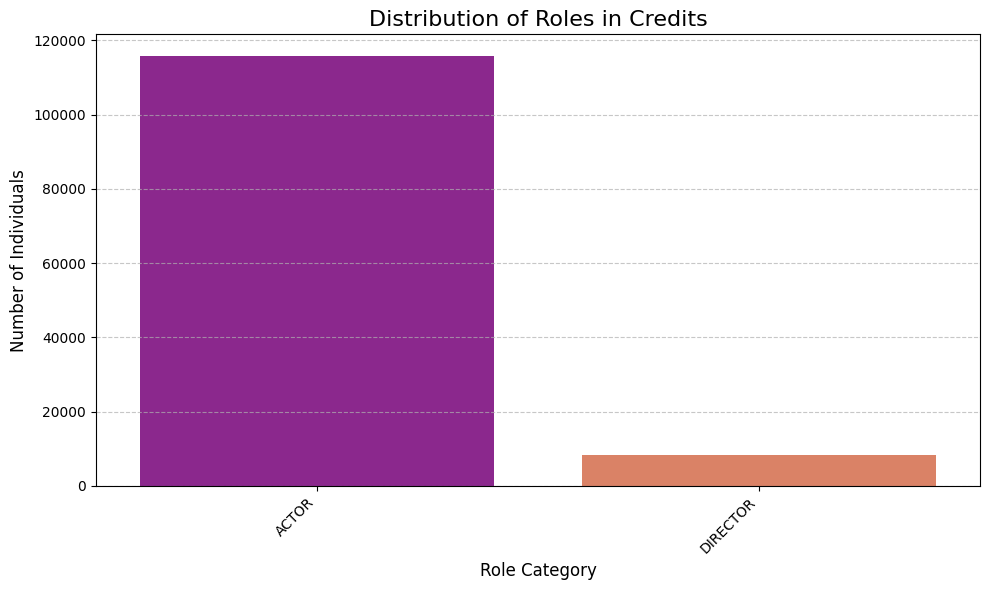

In [ ]:
# Chart - 10 : Distribution of Roles in Credits
if credits_df is not None:
    role_counts = credits_df['role'].value_counts()
    plt.figure(figsize=(10, 6))
    sns.barplot(x=role_counts.index, y=role_counts.values, palette='plasma', hue=role_counts.index, legend=False)
    plt.title('Distribution of Roles in Credits', fontsize=16)
    plt.xlabel('Role Category', fontsize=12)
    plt.ylabel('Number of Individuals', fontsize=12)
    plt.xticks(rotation=45, ha='right')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

##### 1. Why did you pick the specific chart?

A bar chart is ideal for visualizing the distribution of a categorical variable like 'role'. It clearly shows the number of individuals belonging to each role, making it easy to compare their representation in the credits data.

##### 2. What is/are the insight(s) found from the chart?

The chart clearly shows that 'ACTOR' is by far the most prevalent role in the credits data, with a significantly higher count than 'DIRECTOR'. This is expected, as most productions involve numerous actors but typically only one or a few directors. The sheer volume of 'ACTOR' entries highlights the extensive cast information available.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Well, Understanding this distribution helps in recognizing the primary focus of the 'credits' dataset, which is heavily geared towards acting roles. This can inform strategies for features like 'cast browsing' or 'actor profiles' on the platform. It also confirms that there's a rich dataset for analyzing actor prevalence, collaborations, and individual contributions across titles.

The extremely disproportionate number of 'ACTOR' entries compared to 'DIRECTOR' (and presumably other crew roles if they were present in the data) isn't necessarily a negative for growth, but it does mean the dataset's utility for analyzing the creative contributions of non-acting roles is limited. If the platform aims to highlight directors, writers, or producers more, it would need a more balanced representation or additional data sources for those roles.

#### Chart - 11 - Horizontal Bar Plot

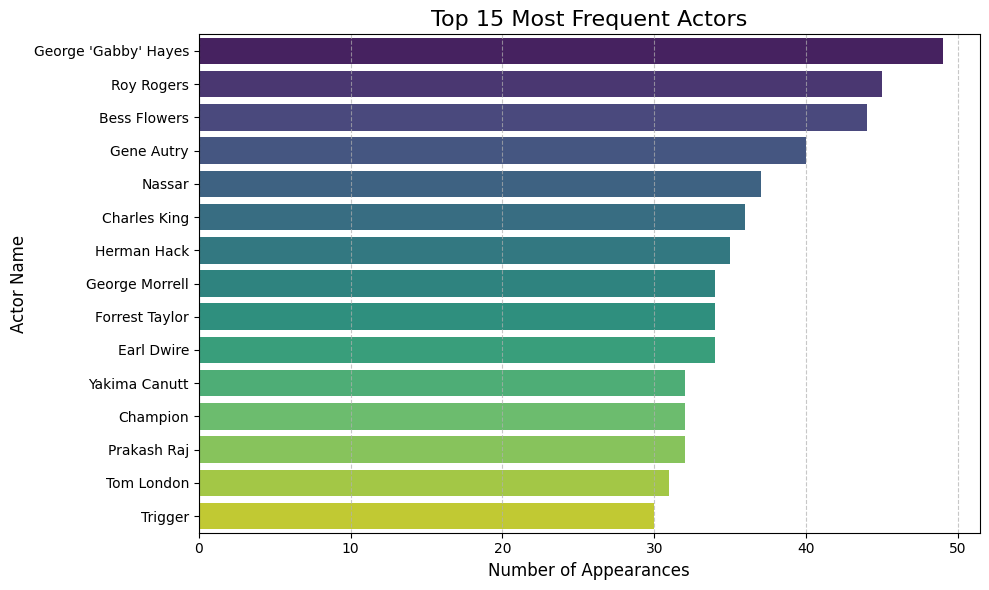

In [ ]:
# Chart - 11 : Top 15 Most Frequent Actors
if credits_df is not None:
    # Filtering the dataframe for 'ACTOR' roles and to count their occurrences
    actor_counts = credits_df[credits_df['role'] == 'ACTOR']['name'].value_counts()
    # Converting to DataFrame for easier plotting, taking the top 15
    top_actors_df = pd.DataFrame(actor_counts.head(15)).reset_index()
    top_actors_df.columns = ['Actor Name', 'Number of Appearances']
    plt.figure(figsize=(10, 6))
    sns.barplot(x='Number of Appearances', y='Actor Name', data=top_actors_df, palette='viridis',hue='Actor Name', legend=False)
    plt.title('Top 15 Most Frequent Actors', fontsize=16)
    plt.xlabel('Number of Appearances', fontsize=12)
    plt.ylabel('Actor Name', fontsize=12)
    plt.grid(axis='x', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

##### 1. Why did you pick the specific chart?

A horizontal bar chart is excellent for showcasing the top N categories, in this case, the top 15 actors by their number of appearances. It provides a clear ranking and easy comparison of how often certain actors appear in the content library.

##### 2. What is/are the insight(s) found from the chart?

The chart clearly shows that 'George 'Gabby' Hayes' is the most frequently appearing actor, with significantly more appearances than others, followed by 'Roy Rogers' and 'Bess Flowers'. What's striking is that many of the top actors appear to be from an older era of filmmaking, suggesting a substantial presence of classic or vintage content. The list also includes 'Prakash Raj', indicating some diversity in the origin of these frequently appearing actors.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Identifying these highly frequent actors can be a goldmine for content promotion. If the platform has a lot of content featuring 'George 'Gabby' Hayes' or 'Roy Rogers', it can create dedicated collections or marketing campaigns around them, leveraging their established presence. This could be particularly effective for audiences who enjoy classic films or specific genres these actors are known for, potentially driving engagement and watch time within that niche.

While having a strong collection of classic content is good, an over-reliance on a small pool of actors, especially those predominantly from older eras, might make the platform feel less current or diverse to viewers seeking more contemporary or varied content. If the platform doesn't also feature a healthy rotation of newer and diverse acting talent, it could lead to a perception of a stale library for some users, potentially impacting new subscriber acquisition and overall growth among broader demographics.

#### Chart - 12 - Bar Plot

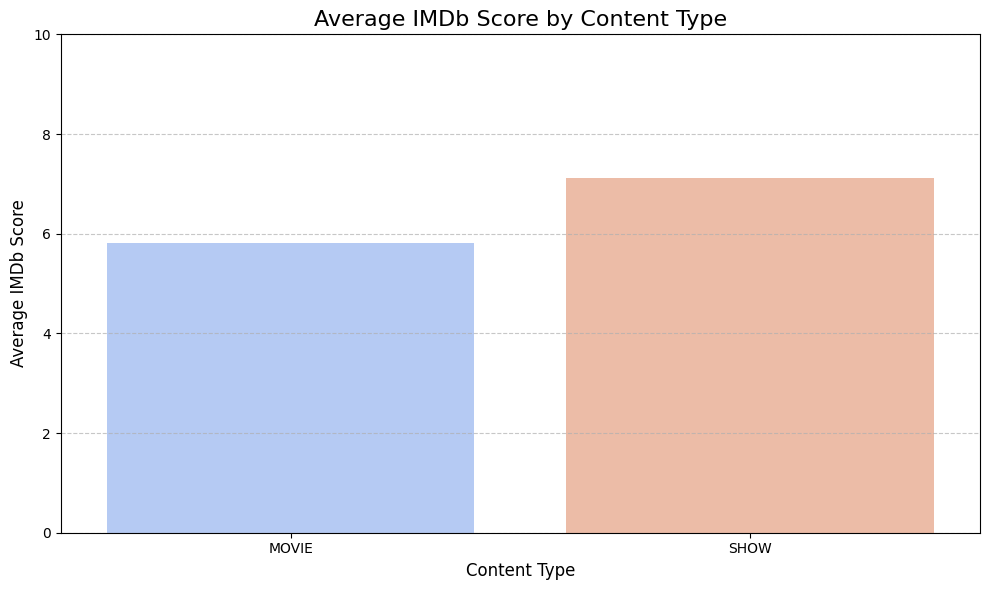

In [ ]:
# Chart - 12 : Average IMDb Score by Content Type
if titles_df is not None:
    # Calculating the average IMDb score for each content type
    avg_imdb_score_by_type = titles_df.groupby('type')['imdb_score'].mean().reset_index()
    plt.figure(figsize=(10, 6))
    sns.barplot(x='type', y='imdb_score', data=avg_imdb_score_by_type, palette='coolwarm', hue='type', legend=False)
    plt.title('Average IMDb Score by Content Type', fontsize=16)
    plt.xlabel('Content Type', fontsize=12)
    plt.ylabel('Average IMDb Score', fontsize=12)
    plt.ylim(0, 10) # As IMDb scores are typically 0-10
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

##### 1. Why did you pick the specific chart?

A bar chart is ideal for comparing the average of a numerical variable ('imdb_score') across different categories of a categorical variable ('type'). It clearly shows if there's a noticeable difference in average ratings between movies and shows.

##### 2. What is/are the insight(s) found from the chart?

The chart clearly shows that 'SHOW' content generally has a higher average IMDb score compared to 'MOVIE' content. While both types fall within a respectable range, shows appear to be slightly better received by IMDb users on average. This suggests that, quality-wise, the TV show library holds a slight edge in terms of critical perception.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Absolutely. Knowing that the TV shows on this platform tend to be higher-rated on IMDb is a fantastic selling point. We can highlight this in marketing campaigns to attract viewers who prioritize quality TV series. It also suggests that investing more in high-quality show production or acquisition could be a smart move, potentially boosting subscriber satisfaction and retention, especially among those who prefer episodic content.

If the platform's content strategy heavily favors movies (as we saw in an earlier univariate chart) while shows are consistently receiving higher average ratings, it could be a missed opportunity. Users might gravitate towards platforms with a stronger reputation for high-quality TV series if they perceive the movie library, despite its volume, as having a slightly lower average quality. This could lead to churn among show enthusiasts or make it harder to attract new subscribers who value highly-rated series.

#### Chart - 13

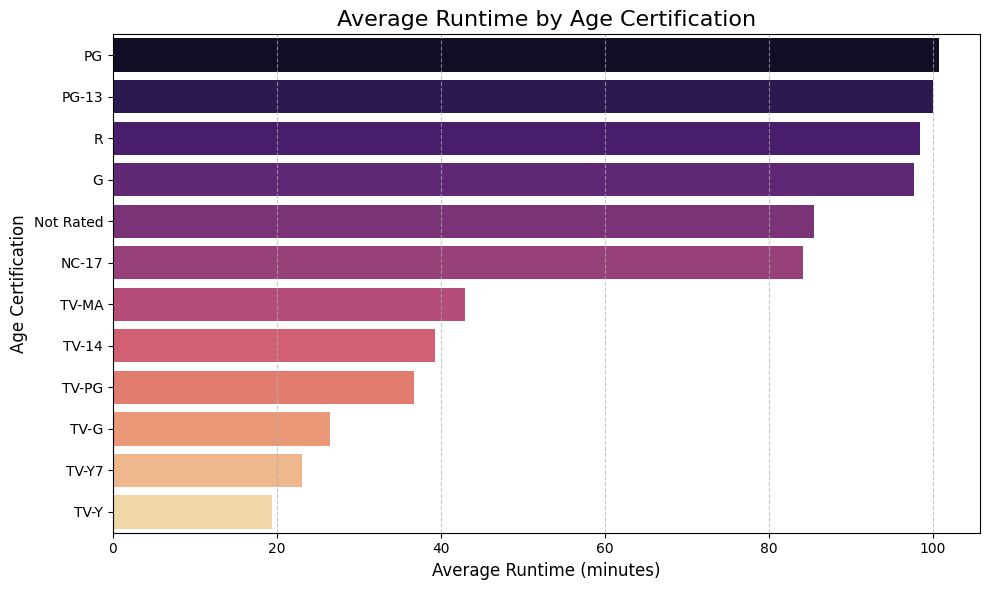

In [ ]:
# Chart - 13 Average Runtime by Age Certification
if titles_df is not None:
    # Calculating the average runtime for each age certification
    avg_runtime_by_age_cert = titles_df.groupby('age_certification')['runtime'].mean().reset_index()
    # Sorting by average runtime for better visualization
    avg_runtime_by_age_cert = avg_runtime_by_age_cert.sort_values(by='runtime', ascending=False)
    plt.figure(figsize=(10, 6))
    sns.barplot(x='runtime', y='age_certification', data=avg_runtime_by_age_cert, palette='magma', hue='age_certification', legend=False)
    plt.title('Average Runtime by Age Certification', fontsize=16)
    plt.xlabel('Average Runtime (minutes)', fontsize=12)
    plt.ylabel('Age Certification', fontsize=12)
    plt.grid(axis='x', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

##### 1. Why did you pick the specific chart?

A horizontal bar chart is excellent for comparing the average of a numerical variable ('runtime') across multiple categories of a categorical variable ('age_certification'). It clearly shows if certain age ratings are associated with longer or shorter content durations.

##### 2. What is/are the insight(s) found from the chart?

The chart reveals a clear pattern: content with 'PG', 'PG-13', 'R', and 'G' certifications tends to have the longest average runtimes, generally clustering around 90-100 minutes. This strongly suggests that feature-film length content is prevalent in these rating categories. As we move towards more specific TV ratings (like 'TV-MA', 'TV-14', 'TV-PG', 'TV-G', 'TV-Y7', 'TV-Y'), the average runtime drops significantly, with content for very young audiences ('TV-Y') being the shortest. Interestingly, 'Not Rated' content also falls into a mid-range, similar to 'NC-17' and 'TV-MA'.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Understanding this relationship is super helpful for content recommendations and marketing. For instance, if a user is looking for a longer movie, the platform knows to suggest titles from the 'PG', 'PG-13', 'R', or 'G' categories. Conversely, if someone wants a quick watch, it can direct them towards 'TV-Y' or 'TV-G' content. This tailored approach improves user experience and makes content discovery more efficient, potentially increasing watch time and satisfaction.

If the platform's content strategy doesn't align with these typical runtime expectations for different age groups, it could lead to frustration. For example, if a significant portion of content for young children (e.g., 'TV-Y') is unexpectedly long, or if adult-oriented content ('R', 'NC-17') is consistently very short, it might not meet viewer expectations. This mismatch could result in lower engagement, shorter viewing sessions, and ultimately, a decrease in user retention for those specific demographics.

#### Chart - 14 - Correlation Heatmap

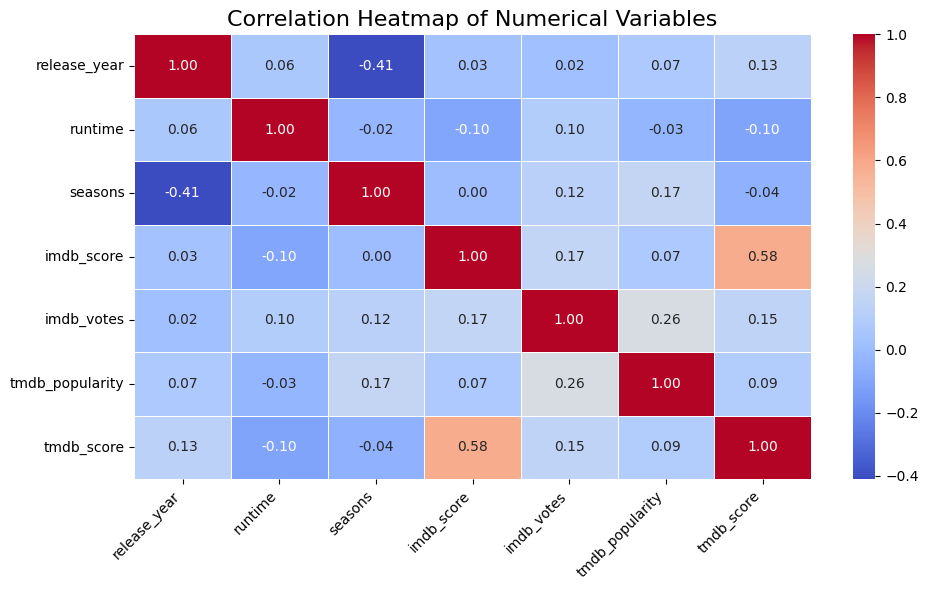

In [ ]:
# Chart - 14 : Correlation Heatmap of Numerical Variables
if titles_df is not None:
    # Selecting only numerical columns for correlation
    numerical_cols = titles_df.select_dtypes(include=['number']).columns
    # Calculating the correlation matrix
    correlation_matrix = titles_df[numerical_cols].corr()
    plt.figure(figsize=(10, 6))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
    plt.title('Correlation Heatmap of Numerical Variables', fontsize=16)
    plt.xticks(rotation=45, ha='right')
    plt.yticks(rotation=0)
    plt.tight_layout()
    plt.show()

##### 1. Why did you pick the specific chart?

A correlation heatmap is the ideal choice for visualizing the relationships between multiple numerical variables. It uses color intensity to quickly show the strength and direction (positive or negative) of linear correlations, making it easy to spot patterns at a glance.

##### 2. What is/are the insight(s) found from the chart?

The heatmap reveals several interesting relationships. First, 'imdb_score' and 'tmdb_score' are quite strongly positively correlated (0.58), which makes sense as both are quality ratings. 'imdb_votes' shows a moderate positive correlation with 'tmdb_popularity' (0.26) and a weaker positive correlation with 'imdb_score' (0.17). 'Release year' has a weak positive correlation with 'tmdb_popularity' (0.07) and 'tmdb_score' (0.13), suggesting newer content might be slightly more popular or rated. Interestingly, 'seasons' has a negative correlation with 'release_year' (-0.41) and 'runtime' (-0.02), which is logical as shows tend to have shorter individual episode runtimes and older shows might have fewer recorded seasons in this dataset.

#### Chart - 15 - Pair Plot

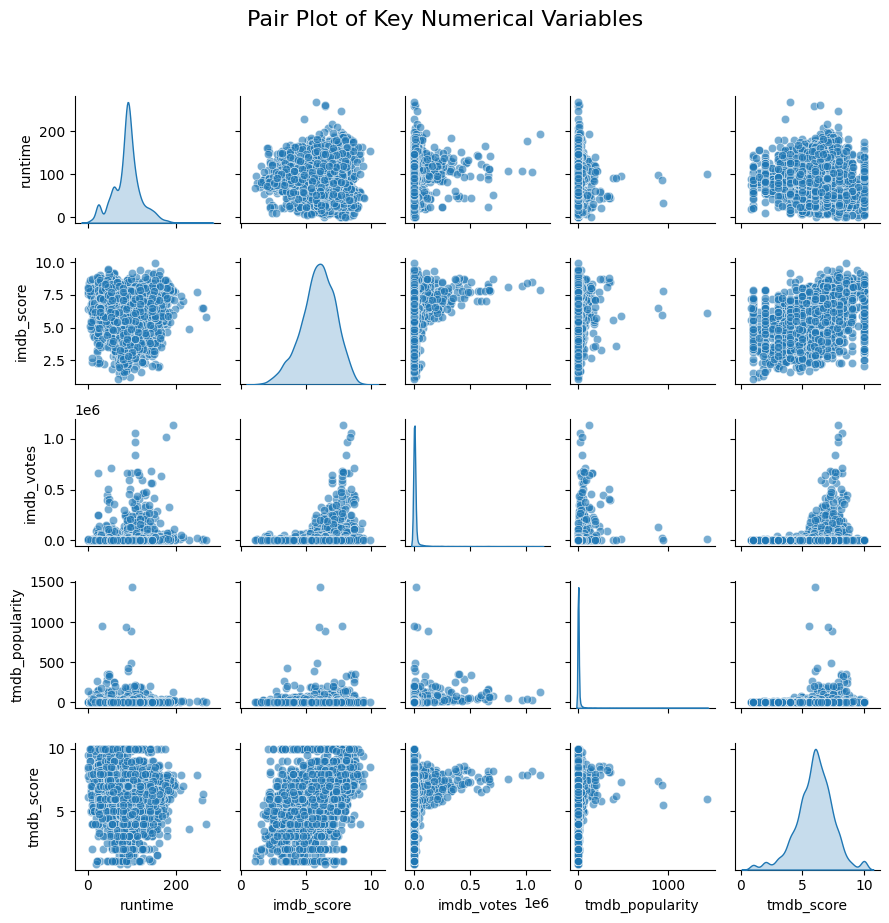

In [ ]:
# Chart - 15 : Pair Plot of Numerical Variables
if titles_df is not None:
    # Selecting only numerical columns for the pair plot
    numerical_cols = titles_df.select_dtypes(include=['number']).columns
    # Excluding 'seasons' and 'release_year' columns as they don't show strong linear relationship and for a cleaner plot and only focusing on score, votes, popularity and runtime.
    cols_for_pairplot = ['runtime', 'imdb_score', 'imdb_votes', 'tmdb_popularity', 'tmdb_score']
    # Dropping rows with NaN values in these specific columns for cleaner pair plot
    df_for_pairplot = titles_df[cols_for_pairplot].dropna()
    sns.pairplot(df_for_pairplot, diag_kind='kde', plot_kws={'alpha': 0.6}, height=1.8)
    plt.suptitle('Pair Plot of Key Numerical Variables', y=1.02, fontsize=16)
    plt.tight_layout(rect=[0, 0, 1, 0.98])
    plt.show()

##### 1. Why did you pick the specific chart?

A pair plot is chosen as the final chart because it provides a comprehensive overview of relationships between all pairs of numerical variables, including their individual distributions (histograms/KDEs on the diagonal) and scatter plots for each pair. It's excellent for spotting trends, clusters, and outliers that might not be obvious in a simple correlation matrix.

##### 2. What is/are the insight(s) found from the chart?

Looking at the pair plot, we can clearly see the individual distributions on the diagonal: 'runtime' is mostly concentrated around 90-100 minutes, and both 'imdb_score' and 'tmdb_score' show a bell-shaped curve centered around 6-7. 'imdb_votes' and 'tmdb_popularity' are heavily skewed, with most content having very low values and a few outliers with extremely high numbers. For the scatter plots, we can visually confirm the positive correlation between 'imdb_score' and 'tmdb_score' – they tend to move together. There's also a noticeable positive relationship between 'imdb_votes' and 'tmdb_popularity', which makes sense. Other relationships appear to be weak or scattered, indicating little linear correlation.

# **5. Solution to Business Objective**

#### What do you suggest the client to achieve Business Objective ?
Explain Briefly.

Okay, so from what we've seen in the data, it looks like Amazon Prime Video has a really strong base with things like drama and comedy, and a lot of their stuff comes from the US and India. Plus, people seem to rate their TV shows pretty well.

So, my suggestion would be: **Let's keep doing what's working, but also try to add more variety.**

What I mean is, we should keep getting those good shows and the dramas and comedies that people like. But, we also saw that some types of content, like animation or music, aren't as common. And most of the content is from just a few countries.

Maybe we could try getting more movies and shows from different genres and countries? That way, more people might find something they really like, and it could bring in more subscribers.

Also, we found some shows and movies that people rated really high. Maybe we can do a better job of showing those off to people so they're easier to find and watch.

Basically, let's stick with what's popular, but also try to offer a bit more of everything so more people feel like there's something for them.

# **Conclusion**

**Key Takeaways :**

After looking at the data, I discover Amazon Prime Video has a huge library, mostly movies, with **TV shows often getting better ratings**. Lots of content came out recently, and most films are feature-length.

Generally, the **quality is decent**, but **popularity is uneven**, with only some titles being very popular. **Drama and Comedy are the main genres**, and much of the content is from the **US, India, and the UK**. A lot of content also needs age ratings. The credits data mainly focuses on **actors**, with some appearing very frequently, often in older content.

So, the main things are: the platform has a strong base of content. To improve, they could focus on **making good content more discoverable**, adding **more variety in genres and countries**, and **sorting out the age ratings**. This could help bring in more viewers and keep them engaged.

